In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


In [20]:
data = pd.read_csv('data_clean_csv.csv')

In [39]:
data

,Temperature,Mass Loss,Density,Porosity,P-Wave,S-Wave,Ed,Damage,TC
0,25,0.000000,2.666755,1.12000,3683.000,2173.000,36.17317,0.000000,2.393781
1,25,0.000000,2.693423,1.13120,3719.830,2194.730,37.26925,0.000000,2.417719
2,25,0.000000,2.690756,1.13008,3716.147,2192.557,37.15866,0.000000,2.415325
3,25,0.000000,2.688089,1.12896,3712.464,2190.384,37.04829,0.000000,2.412931
4,25,0.000000,2.685422,1.12784,3708.781,2188.211,36.93814,0.000000,2.410537
5,25,0.000000,2.682756,1.12672,3705.098,2186.038,36.82820,0.000000,2.408144
6,25,0.000000,2.680089,1.12560,3701.415,2183.865,36.71848,0.000000,2.405750
7,25,0.000000,2.677422,1.12448,3697.732,2181.692,36.60899,0.000000,2.403356
8,100,0.041000,2.642827,1.30000,3824.000,2179.000,38.64600,-0.078034,2.381300
9,100,0.041410,2.669255,1.31300,3862.240,2200.790,39.81701,-0.078814,2.405113


In [22]:
data.describe()

,Temperature,Mass Loss,Density,Porosity,P-Wave,S-Wave,Ed,Damage,TC
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,452.500000,0.501553,2.576634,1.907613,2553.947700,1447.287262,20.021589,0.445424,1.693759
std,285.171501,0.421951,0.061758,0.642198,1069.541263,641.652777,13.931202,0.381880,0.710496
min,25.000000,0.000000,2.491100,1.120000,961.000000,393.000000,2.300580,-0.078814,0.511000
25%,200.000000,0.044297,2.520839,1.308775,1495.023750,904.061500,5.633115,0.000000,0.920169
50%,450.000000,0.481900,2.562207,1.753600,2714.300000,1465.680000,18.923210,0.462515,1.948835
75%,700.000000,0.935813,2.631045,2.394875,3706.018750,2179.673000,36.717933,0.842661,2.355933
max,900.000000,1.111000,2.693423,3.090600,3862.240000,2200.790000,39.817010,0.941235,2.417719


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
Temperature    80 non-null int64
Mass Loss      80 non-null float64
Density        80 non-null float64
Porosity       80 non-null float64
P-Wave         80 non-null float64
S-Wave         80 non-null float64
Ed             80 non-null float64
Damage         80 non-null float64
TC             80 non-null float64
dtypes: float64(8), int64(1)
memory usage: 5.7 KB


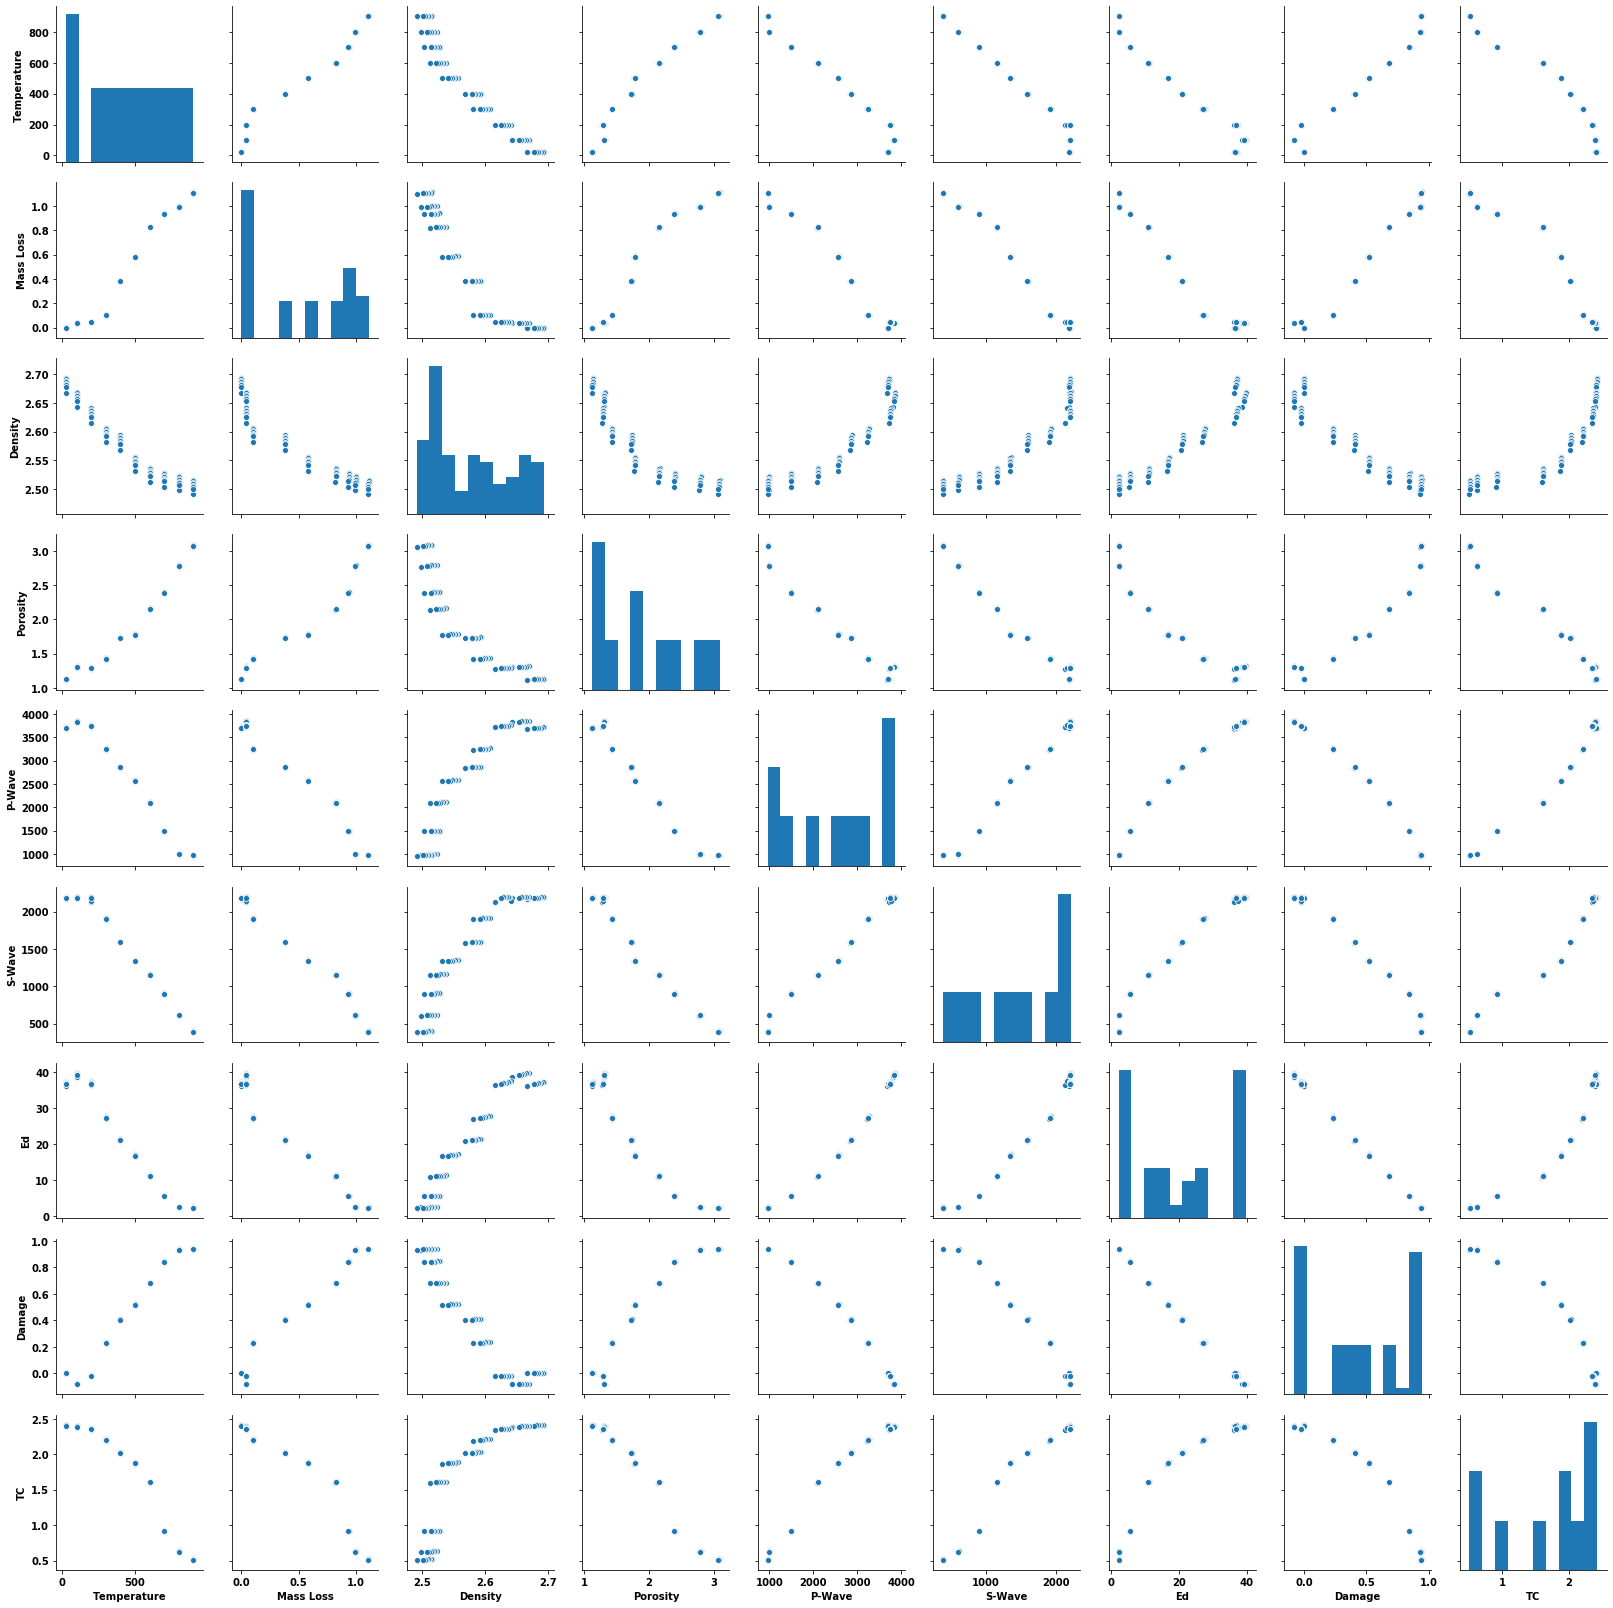

Wall time: 37.3 s


In [24]:
%%time

sns.pairplot(data)
plt.show()

In [29]:
X1 = data.drop('Damage', axis=1)
X = X1.drop('TC', axis=1)
y1 = data['Damage']
y2 = data['TC']

In [31]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=0)

In [33]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y1_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [35]:
y1_pred = regressor.predict(X_test)

In [36]:
df=pd.DataFrame({'Actual':y1_test, 'Predicted':y1_pred})
df

,Actual,Predicted
50,0.684388,0.683710
27,0.232714,0.232368
30,0.232021,0.231790
77,0.937508,0.938440
45,0.519957,0.520733
71,0.932333,0.933261
66,0.936976,0.935845
68,0.935119,0.935845
48,0.678283,0.680997
69,0.934190,0.933261


In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Mean Absolute Error: 0.01139353125
Mean Squared Error: 0.001741889152203124
Root Mean Squared Error: 0.0417359455649818


In [42]:
data.sum()

Temperature     36200.000000
Mass Loss          40.124265
Density           206.130743
Porosity          152.609040
P-Wave         204315.816000
S-Wave         115782.981000
Ed               1601.727100
Damage             35.633954
TC                135.500737
dtype: float64

In [60]:
regressor = DecisionTreeRegressor(max_depth=10)
regressor.fit(X_train, y1_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [61]:
y1_pred = regressor.predict(X_test)

In [62]:
df=pd.DataFrame({'Actual':y1_test, 'Predicted':y1_pred})
df

,Actual,Predicted
50,0.684388,0.683710
27,0.232714,0.232368
30,0.232021,0.231790
77,0.937508,0.938440
45,0.519957,0.519182
71,0.932333,0.933261
66,0.936976,0.935845
68,0.935119,0.935845
48,0.678283,0.680997
69,0.934190,0.933261


In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Mean Absolute Error: 0.011223937499999998
Mean Squared Error: 0.0016857647640624997
Root Mean Squared Error: 0.04105806576133975


# For TC

In [43]:
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=0)

In [44]:
regressor2 = DecisionTreeRegressor()
regressor2.fit(X_train, y2_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [45]:
y2_pred = regressor.predict(X_test)

In [46]:
df2=pd.DataFrame({'Actual':y2_test, 'Predicted':y2_pred})
df2

,Actual,Predicted
50,1.612483,0.683710
27,2.210544,0.232368
30,2.203965,0.231790
77,0.514066,0.938440
45,1.878202,0.520733
71,0.625492,0.933261
66,0.628607,0.935845
68,0.627361,0.935845
48,1.598100,0.680997
69,0.626738,0.933261


In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Mean Absolute Error: 0.966091688125
Mean Squared Error: 1.4263005512375537
Root Mean Squared Error: 1.194278255364952


In [123]:
regressor2 = DecisionTreeRegressor(max_depth=10)
regressor2.fit(X_train, y2_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [118]:
y2_pred = regressor.predict(X_test)

In [119]:
df2=pd.DataFrame({'Actual':y2_test, 'Predicted':y2_pred})
df2

,Actual,Predicted
50,1.612483,0.683710
27,2.210544,0.232368
30,2.203965,0.231790
77,0.514066,0.938440
45,1.878202,0.519182
71,0.625492,0.933261
66,0.628607,0.935845
68,0.627361,0.935845
48,1.598100,0.680997
69,0.626738,0.933261


In [120]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Mean Absolute Error: 0.966358156875
Mean Squared Error: 1.4269655392924754
Root Mean Squared Error: 1.1945566287507994
